In [1]:
%matplotlib inline
import tweepy
import spacy
import pandas as pd

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Load model
nlp = spacy.load('en')

In [5]:
# Create dictionary to hold text and label entities
tweet_dict = {
    "text": [],
    "label": [],
}

In [6]:
# Get tweets from a users timeline
user_tweets = api.user_timeline("PaulONeillYES")

# Loop throught tweets
for tweet in user_tweets:
    
    # Use nlp on each tweet
    doc = nlp(tweet["text"])
    
    # Check if nlp returns no entities
    if not doc.ents:
        print("No entities to visualize")
        print("----------------------------")
    else:
        # Print the entities for each doc
        for ent in doc.ents:
            # Store entities in dictionary
            tweet_dict["text"].append(ent.text)
            tweet_dict["label"].append(ent.label_)
        
        # Display visualization for the tweet
        spacy.displacy.render(doc, style='ent', jupyter=True)
        print("----------------------------")

----------------------------


----------------------------


----------------------------


----------------------------


----------------------------


----------------------------


----------------------------


----------------------------
No entities to visualize
----------------------------
No entities to visualize
----------------------------
No entities to visualize
----------------------------
No entities to visualize
----------------------------


----------------------------
No entities to visualize
----------------------------


----------------------------
No entities to visualize
----------------------------


----------------------------


----------------------------


----------------------------
No entities to visualize
----------------------------


In [7]:
# Convert dictionary to DataFrame
tweet_df = pd.DataFrame(tweet_dict)
tweet_df.head()

,text,label
0,Yankee,NORP
1,4th,ORDINAL
2,🇺,CARDINAL
3,OBJ,ORG
4,BP,ORG


- - - 

# BONUS
Use Pandas to groupby the labels and plot the label frequencies

In [8]:
# Groupy by labels
label_frequency = tweet_df.groupby(['label']).count()

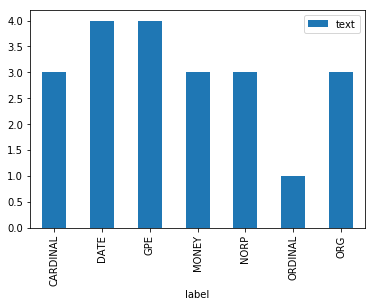

In [9]:
label_frequency.plot.bar()